# Importing OAT

In [1]:
from OAT import *

dataset_path = r"data\vector_analysis\simple_rotation_x15"
test = OAT()

## Data in OAT

Basically, there are 2 pandas dataframes where data are stored.
- self.tracks refers to the dataframe which contains data for each spots such as coordinates, displacement vectors, ...
- self.data refers to the one which contains data at the time point level such as drift, volume, rotation axis, ...

## Loading the dataset into OAT

OAT is able to import data from 3 different sources such as :
- Trackmate
- quickPIV
- standard csv

The method used to import datasets comes with an "auto" mode which tries to determine which one of the 3 above source, the dataset is from. But it can be manually set by the user.

### Looking at the documentation

In [2]:
help(OAT.load_vector_data)

Help on function load_vector_data in module OAT:

load_vector_data(self, dirpath, datatype='auto', rescaling=[1, 1, 1], filtering=False, prefixes=['COORD_', 'VECT_'])
    Load tracking data for the vector analysis pipeline.
    Data is loaded into a pandas dataframe called self.tracks. 
    
    Parameters
    ----------
    dirpath : str
        Path to the folder containing tracking data.
    datatype : str, optional
        Type of data to import. It can be one of this type :
            - tackmate : Load the tracks>spots csv and tracks>edges csv 
                         from Trackmate.
            - quickPIV : Load vtk files from quickPIV.
            - legacy : Load a csv file.
            - auto : (default) try to assume the type and load the file(s).
    rescaling : list of float, optional
        List with rescaling factors for each axis. 
        The default is [1, 1, 1].
    filtering : bool, optional
        If True, cluster the spots to remove those that are not part of th

Rescaling allows you to rescale by a given factor each axis.

Filtering uses the clustering method found in the preprocessing part of OAT. As organoïds are very different from each others, parameters which works for 1 dataset might simply not work for another one. If no parameters are specified, OAT will use the default parameters which are unlikely to work and that's why you should check the results before applying the vector analysis.
You will see an example below.

### Using the default arguments to load the dataset

In [3]:
test.load_vector_data(dirpath = dataset_path)

test.tracks.head()

Opening files ... Done ! (0.1s)
Computing displacement vectors ... Done ! (5.15s)


,TRACK_ID,QUALITY,COORD,TP,TARGET,DISP_VECT
ID0,0,0.0,"[-76.0, 116.0, -51.0]",0,ID200,"[0.0, -1.3629669484372755, 10.35276180410083]"
ID1,1,0.0,"[-80.17113560587966, 115.59798994974877, -47.1...",0,ID201,"[0.0, -2.338242732023744, 10.118513057013544]"
ID2,2,0.0,"[-75.30237142257698, 115.19597989949747, -58.9...",0,ID202,"[0.0, 0.7218124552243239, 10.41552571082839]"
ID3,3,0.0,"[-70.06880068856033, 114.79396984924622, -43.2...",0,ID203,"[0.0, -3.3241481572747063, 9.777013636711033]"
ID4,4,0.0,"[-87.05589988605506, 114.39195979899498, -52.9...",0,ID204,"[0.0, -0.8020192369520913, 10.003206953967286]"


### Checking the dataset using figures methods

Figures is a module which contains all the code making OAT figures.

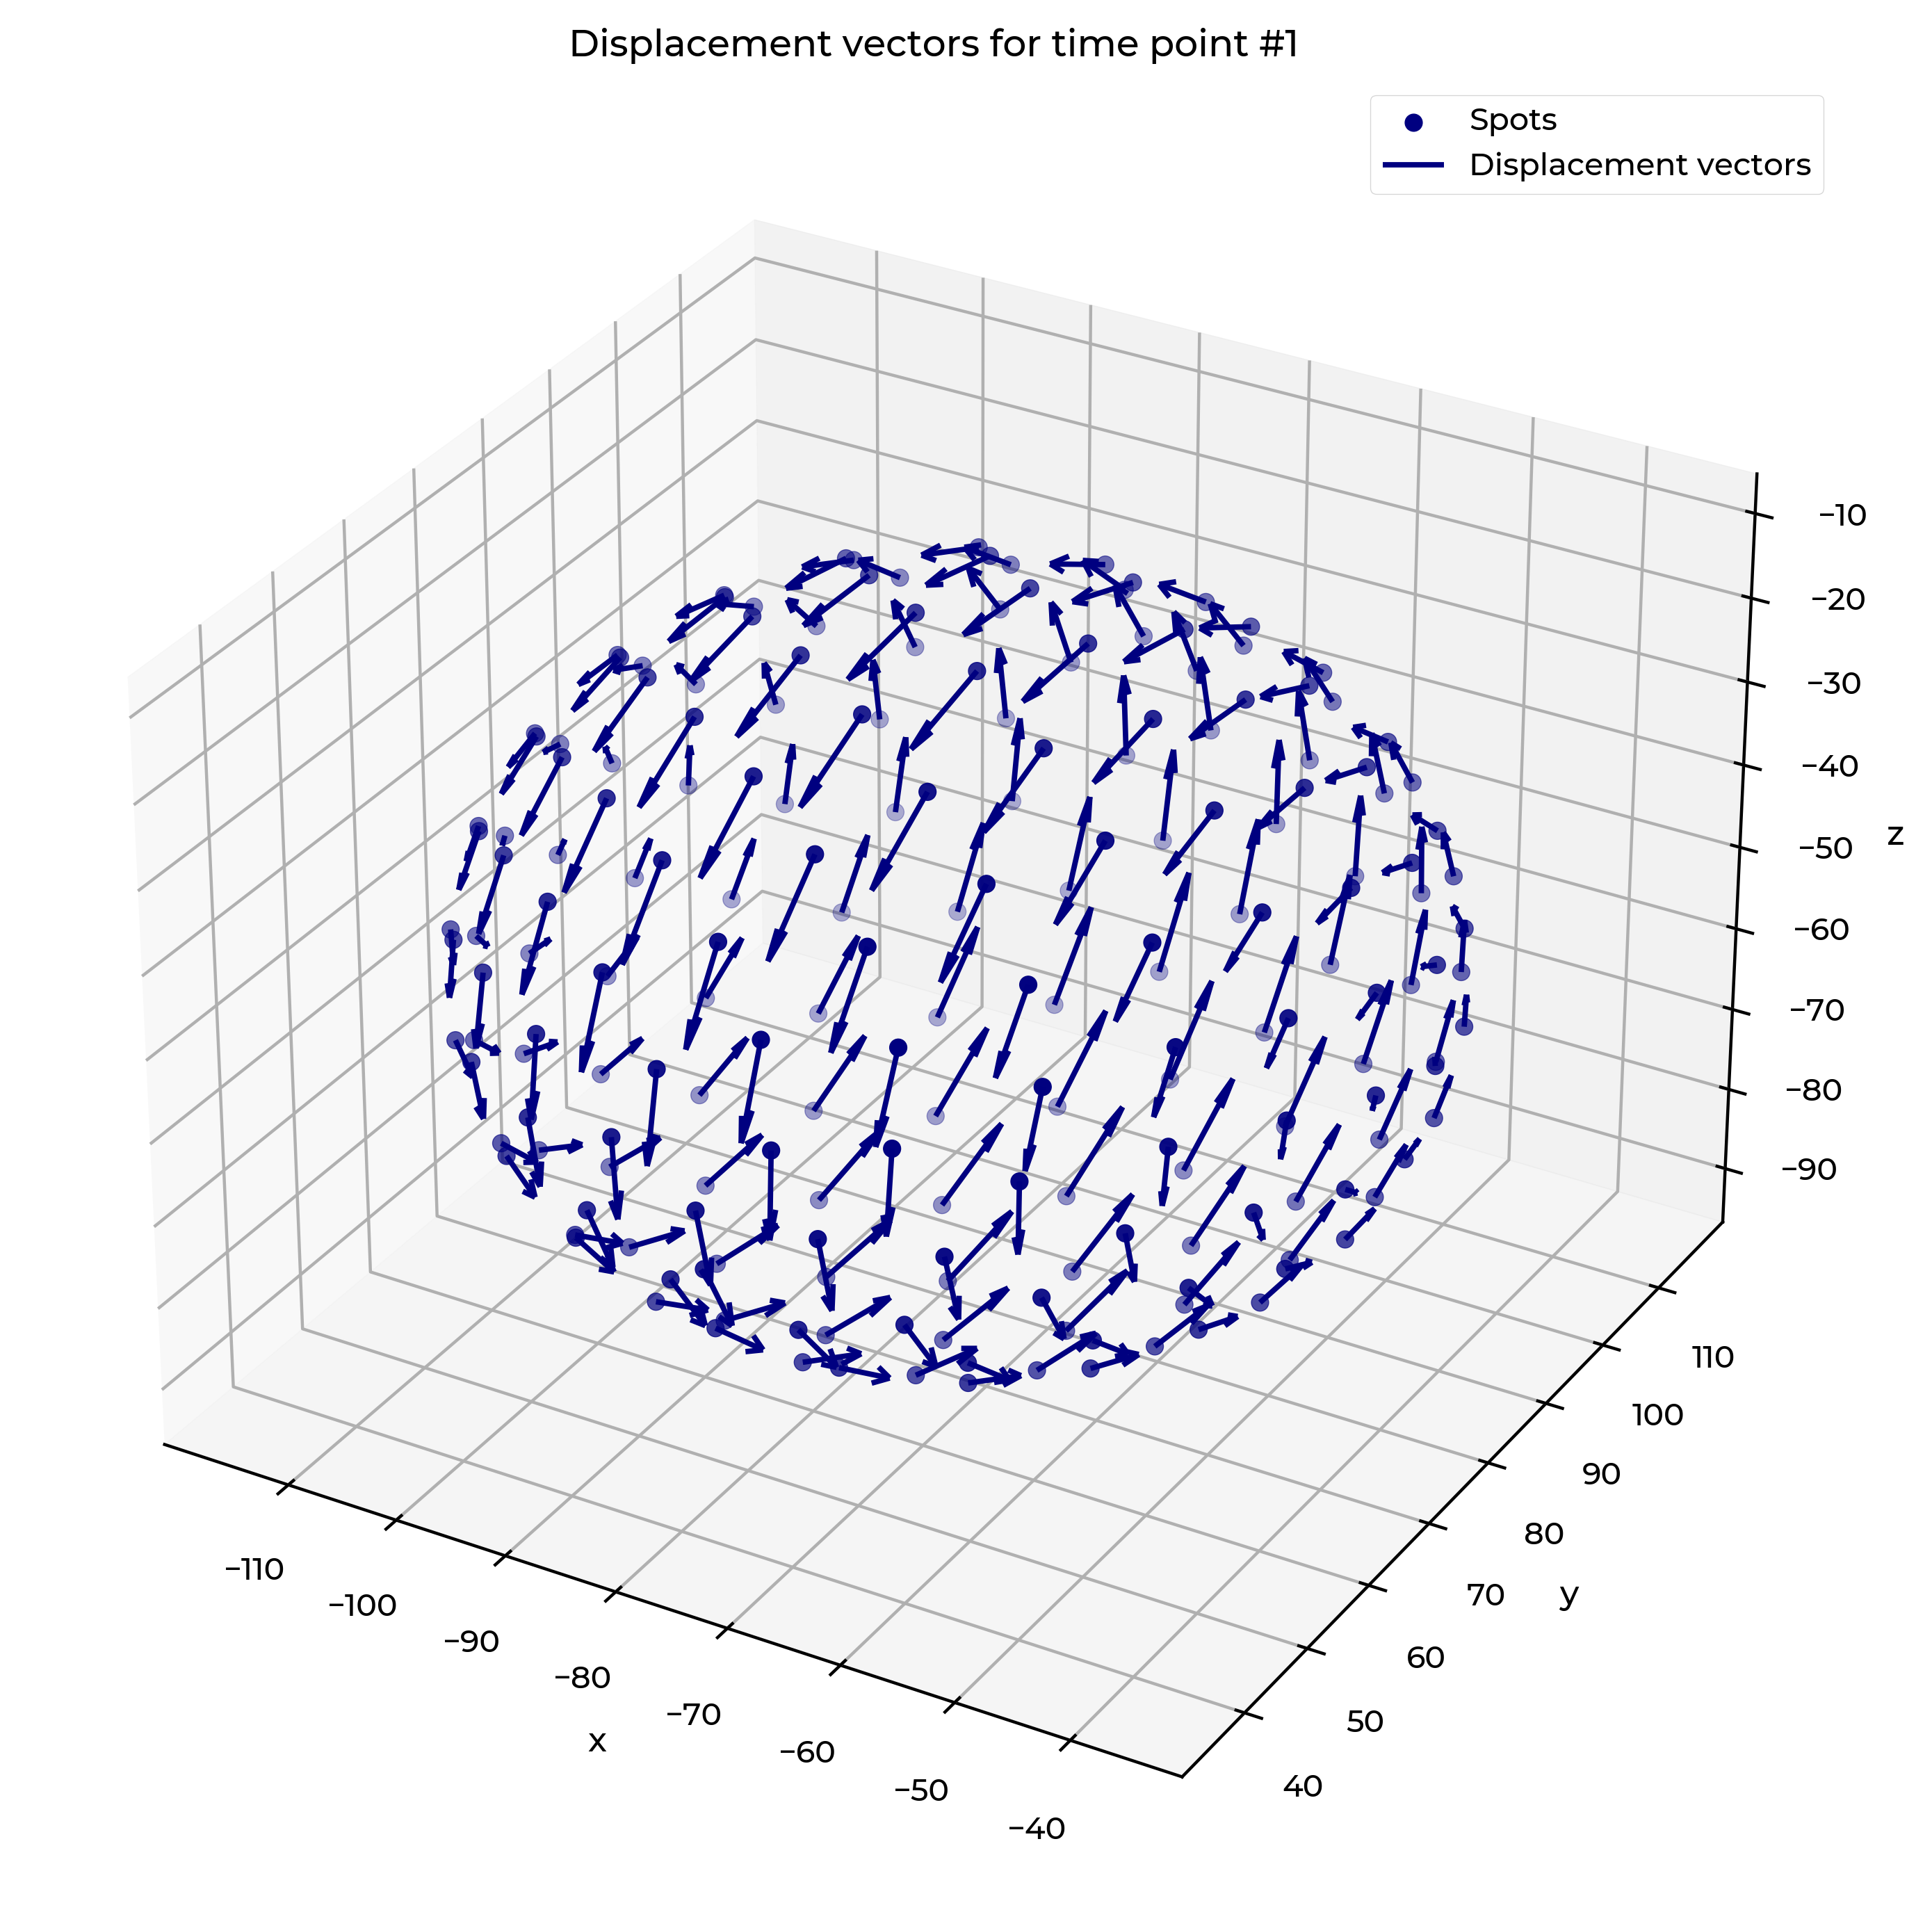

In [4]:
figures.show_data(test.tracks, 1)

Data looks good so we can continue.

## Executing OAT on the dataset

The vector analysis is done using one method : self.vectors_analysis().
It will add informations to the self.tracks dataframe and will also create self.data.

### Looking at the documentation

In [5]:
help(OAT.vectors_analysis)

Help on function vectors_analysis in module OAT:

vectors_analysis(self, savepath=None)
    Compute the full OAT analysis on the imported data.
    
    Parameters
    ----------
    savepath : str, optional
        Path to the folder where figures any export file must be saved. 
        The default is "export" folder created in the input data folder.



We except an angular velocity of 15 degree since the dataset is synthetic. We also except no drift and no volume variation for the same reason.

Computing drift ... Done ! (0.06s)
Computing volume and radius ... Done ! (0.1s)
Translating coordinates to the center ... Done ! (0.34s)
Computing the axis of rotations ... Done ! (0.13s)
Aligning rotation axis and Z axis ... Done ! (1.45s)
Computing angular velocity ... Done ! (12.58s)

Analysis done ! Total time : 14.66 sec


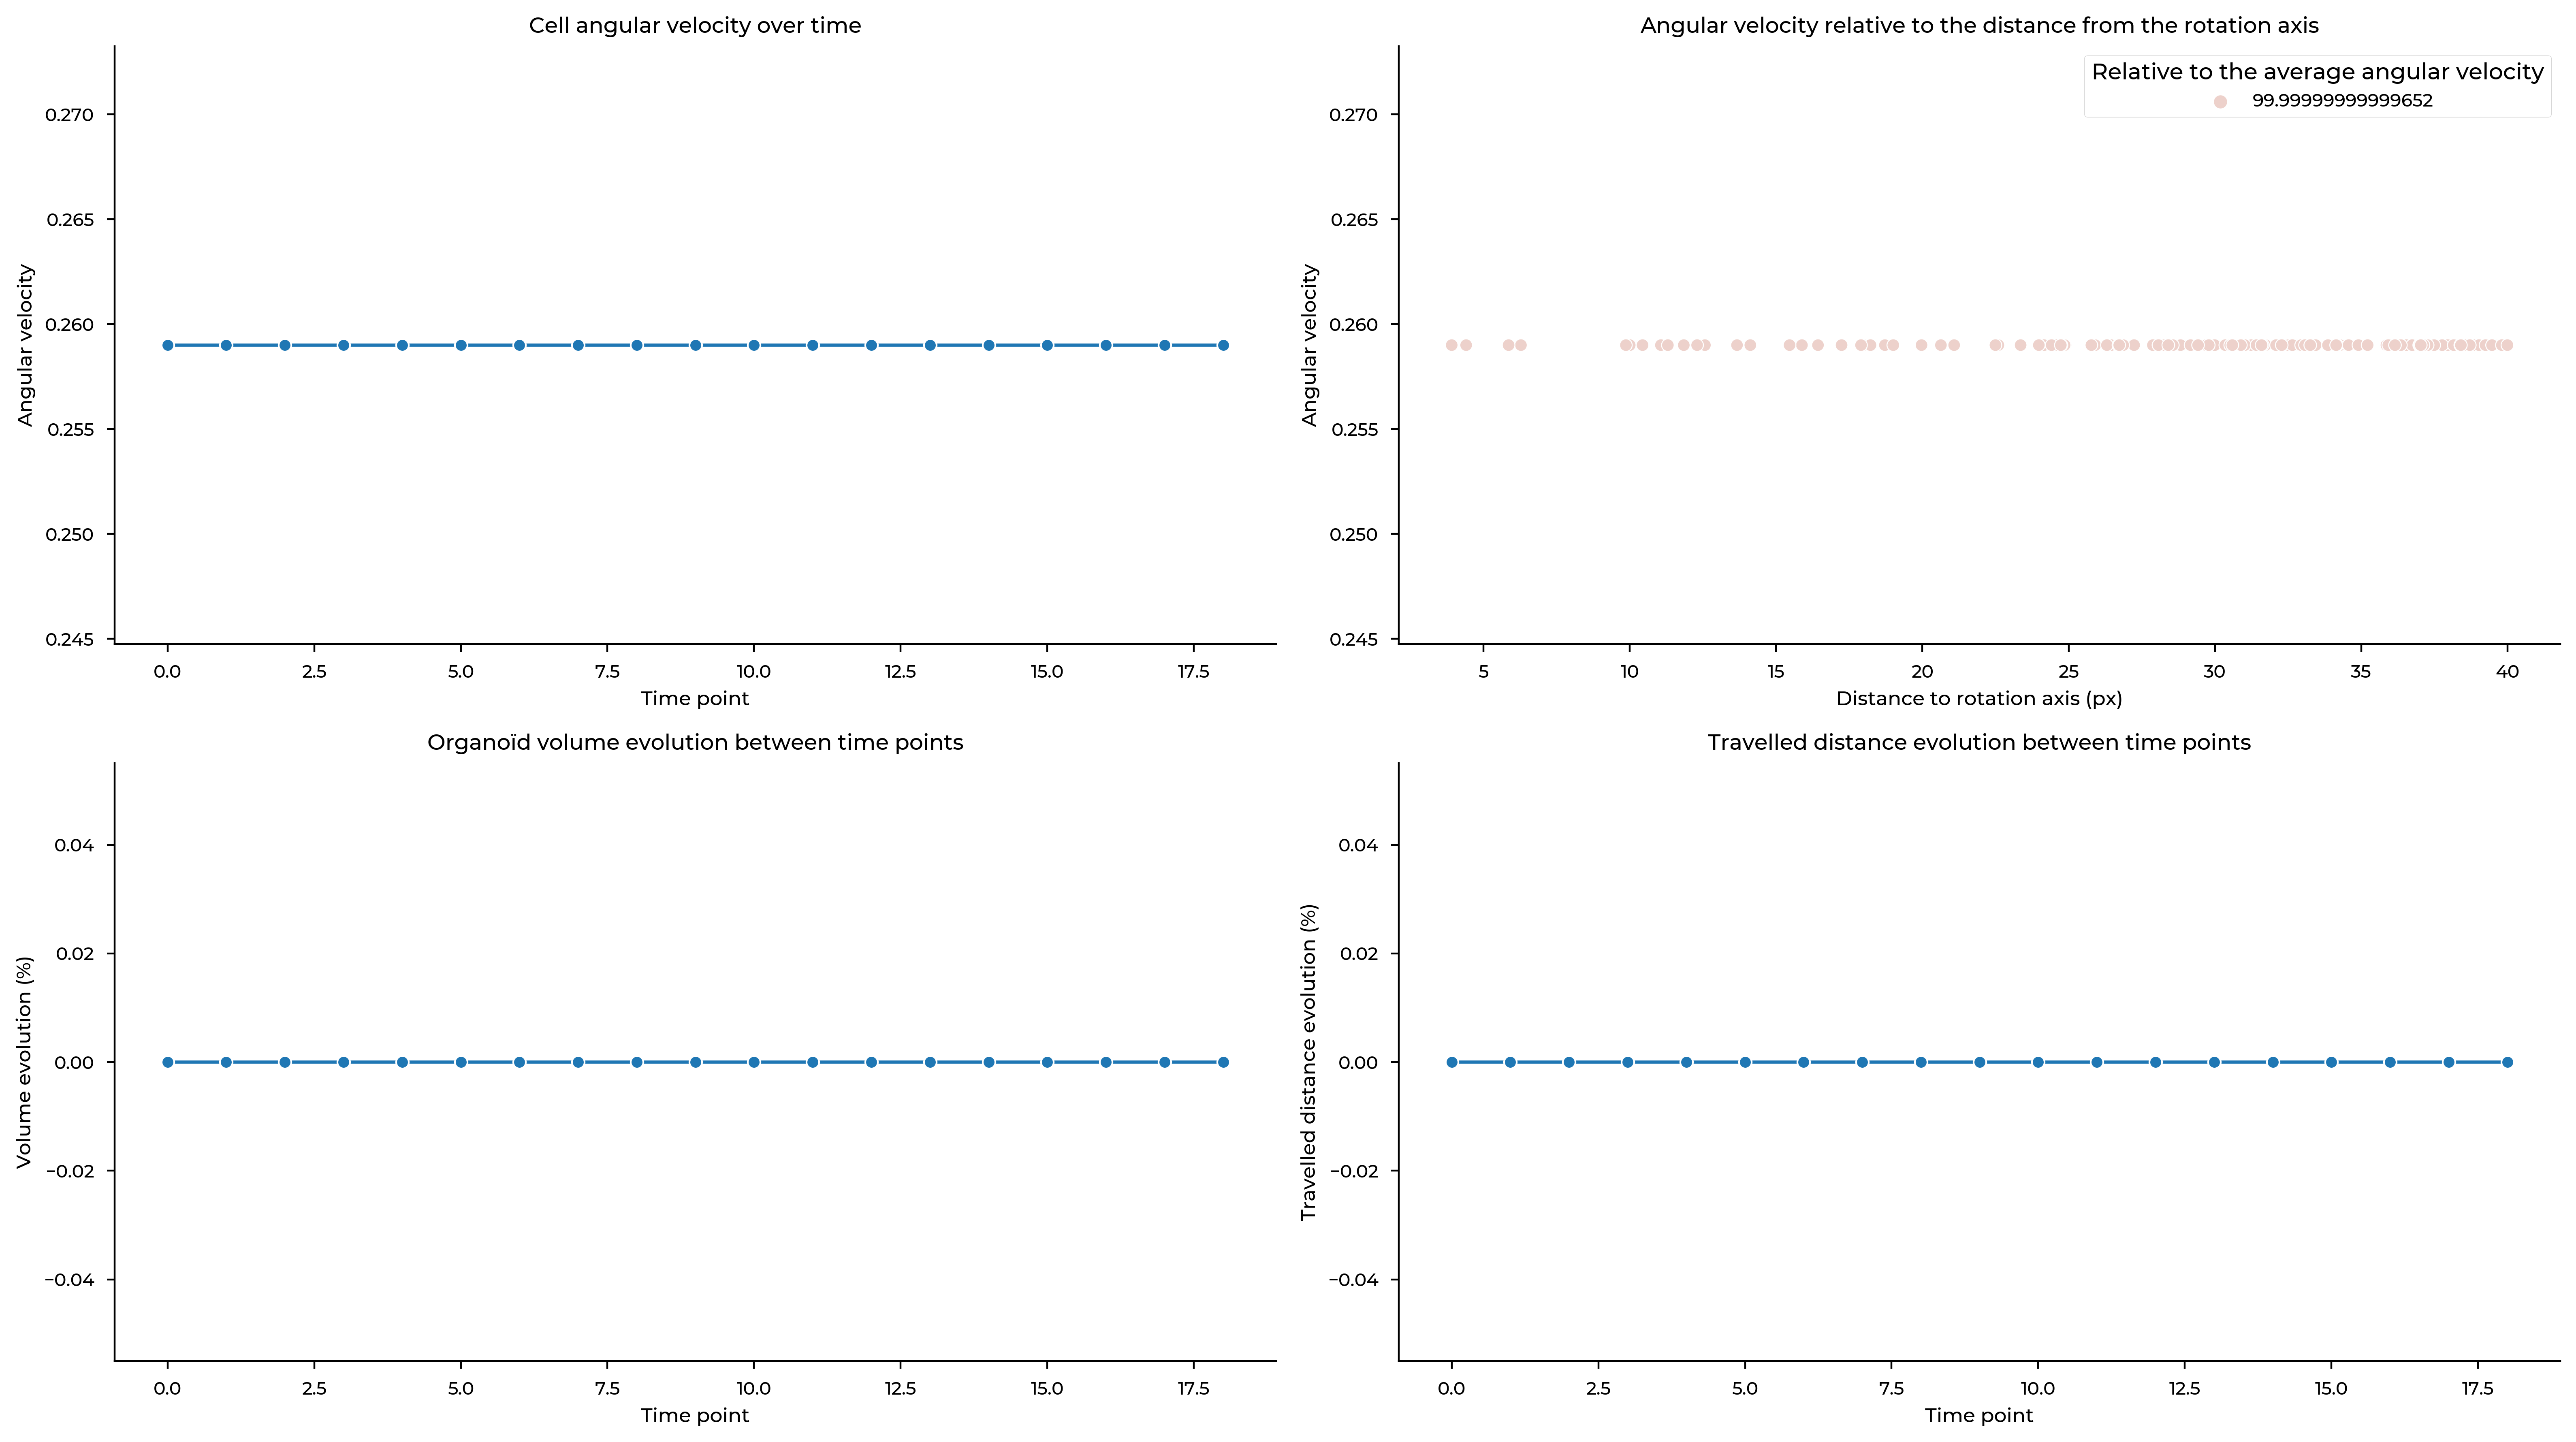

,TRACK_ID,QUALITY,COORD,TP,TARGET,DISP_VECT,CENTRD_COORD,ALIGNED_COORD,ALIGNED_DISP_VECT,R_VECT,R,AV_VECT,AV_RAD,AV_DEG
ID0,0,0.0,"[-76.0, 116.0, -51.0]",0,ID200,"[0.0, -1.3629669484372755, 10.35276180410083]","[0.022790375652562034, 40.0, 0.000804827403207...","[0.0008048274032028558, -40.0, 0.0227903756525...","[10.35276180410083, 1.3629669484372742, -6.339...","[0.0, 40.0, 0.001]",40.000,"[0.259, 0.0, -0.0]",0.259,14.829
ID1,1,0.0,"[-80.17113560587966, 115.59798994974877, -47.1...",0,ID201,"[0.0, -2.338242732023744, 10.118513057013544]","[-4.148345230227093, 39.597989949748765, 3.821...","[3.821906723055891, -39.597989949748765, -4.14...","[10.118513057013544, 2.3382427320237427, -6.19...","[0.0, 39.598, 3.822]",39.782,"[0.259, 0.0, -0.0]",0.259,14.829
ID2,2,0.0,"[-75.30237142257698, 115.19597989949747, -58.9...",0,ID202,"[0.0, 0.7218124552243239, 10.41552571082839]","[0.7204189530755798, 39.19597989949747, -7.948...","[-7.948312990704136, -39.19597989949747, 0.720...","[10.41552571082839, -0.7218124552243251, -6.37...","[0.0, 39.196, -7.948]",39.994,"[0.259, -0.0, 0.0]",0.259,14.829
ID3,3,0.0,"[-70.06880068856033, 114.79396984924622, -43.2...",0,ID203,"[0.0, -3.3241481572747063, 9.777013636711033]","[5.953989687092232, 38.793969849246224, 7.7370...","[7.7370040275112215, -38.793969849246224, 5.95...","[9.777013636711033, 3.324148157274705, -5.9866...","[0.0, 38.794, 7.737]",39.558,"[0.259, 0.0, -0.0]",0.259,14.829
ID4,4,0.0,"[-87.05589988605506, 114.39195979899498, -52.9...",0,ID204,"[0.0, -0.8020192369520913, 10.003206953967286]","[-11.033109510402497, 38.391959798994975, -1.9...","[-1.954828190798649, -38.391959798994975, -11....","[10.003206953967286, 0.8020192369520901, -6.12...","[0.0, 38.392, -1.955]",38.442,"[0.259, -0.0, -0.0]",0.259,14.829


In [6]:
test.vectors_analysis()

## Checking self.tracks
test.tracks.head()

In [7]:
# Checking self.data
test.data.head()

,CENTROID,CLUST_CENTROID,DRIFT,DRIFT_VECT,VOLUME,RADIUS,CENTRD_CENTROID,V1,V2,RA_VECT,ALIGNED_RA_VECT,Theta_X,Theta_Y,MEAN_AV,STD_AV
0,"[-76.02279037565256, 76.0, -51.00080482740321]",NaN,0.0,"[0.0, 0.00020830465997789815, 2.74238287616412...",260130.21,39.6,"[0.0, 0.0, 0.0]","[0.0, -0.1615554882496425, 0.9868636299998189]","[-0.0, -0.9868636299998189, -0.1615554882496426]","[0.9999999999999999, 0.0, -0.0]","[6.123233995736765e-17, 0.0, 0.9999999999999999]",3.141593,-1.570796,0.259,2.782523e-16
1,"[-76.02279037565256, 76.00020830465998, -51.00...",NaN,0.0,"[0.0, 0.00019410904162953102, 8.04025976108846...",260130.21,39.6,"[0.0, 0.0, 0.0]","[0.0, -0.4114697208420325, 0.9114234300423595]","[-0.0, -0.9114234300423595, -0.4114697208420326]","[1.0, 0.0, -0.0]","[6.123233995736766e-17, 0.0, 1.0]",3.141593,-1.570796,0.259,2.782523e-16
2,"[-76.02279037565256, 76.00040241370161, -51.00...",NaN,0.0,"[0.0, 0.00016668521287499516, 0.00012790206233...",260130.21,39.6,"[0.0, 0.0, 0.0]","[0.0, -0.6333429719448985, 0.7738712295259488]","[-0.0, -0.7738712295259489, -0.6333429719448984]","[1.0000000000000002, 0.0, -0.0]","[6.123233995736767e-17, 0.0, 1.0000000000000002]",3.141593,-1.570796,0.259,2.782523e-16
3,"[-76.02279037565256, 76.00056909891448, -51.00...",NaN,0.0,"[0.0, 0.00012790206235990809, 0.00016668521288...",260130.21,39.6,"[0.0, 0.0, 0.0]","[0.0, -0.8120549461584715, 0.5835809836000165]","[-0.0, -0.5835809836000165, -0.8120549461584712]","[1.0000000000000004, 0.0, -0.0]","[6.123233995736769e-17, 0.0, 1.0000000000000004]",3.141593,-1.570796,0.259,2.782523e-16
4,"[-76.02279037565256, 76.00069700097684, -51.00...",NaN,0.0,"[0.0, 8.040259761799007e-05, 0.000194109041636...",260130.21,39.6,"[0.0, 0.0, 0.0]","[0.0, -0.9354267177755822, 0.3535206580549452]","[-0.0, -0.35352065805494526, -0.9354267177755821]","[1.0, 0.0, -0.0]","[6.123233995736766e-17, 0.0, 1.0]",3.141593,-1.570796,0.259,2.782523e-16


## Exporting results

The method export is used to export all available dataframes in .csv files. OAT uses arrays as values for columns such as coordinates, displacement vectors, etc... but arrays are not available in csv files so they are splitted into 3 columns whose names are the original column name where the axis is added. For example, arrays from the "COORD" column will be splitted into "COORD_X", "COORD_Y" and "COORD_Z".

In [8]:
test.export(savedir = r"export")

This conclude the basic demo of OAT :)